In [23]:
import pandas as pd # For data manipulation and analysis
import numpy as np # For working with arrays
import matplotlib.pyplot as plt # For plots and visualizatio
import seaborn as sns # For visualizations

In [24]:
data = pd.read_csv('master.csv')
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [25]:
data.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [26]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [27]:
data.shape

(27820, 12)

In [28]:
data.dtypes.value_counts()

object     6
int64      4
float64    2
dtype: int64

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


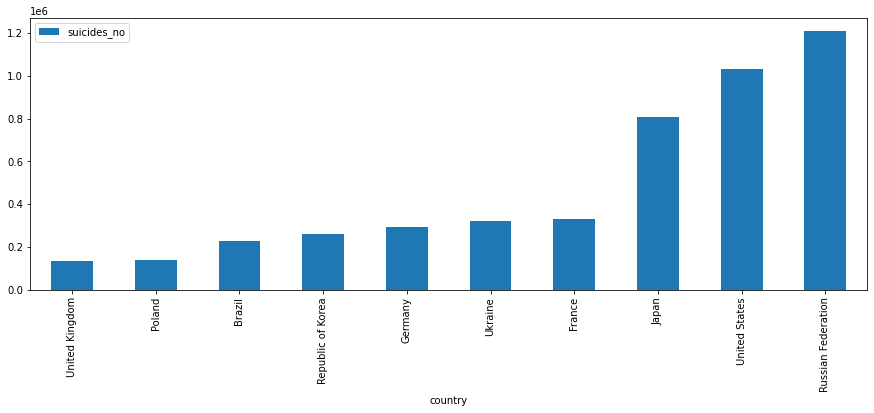

In [30]:
data.groupby(by=['country'])['suicides_no'].sum().reset_index().sort_values(['suicides_no']).tail(10).plot(x = 'country',y ='suicides_no',kind = 'bar',figsize=(15,5))
plt.show()

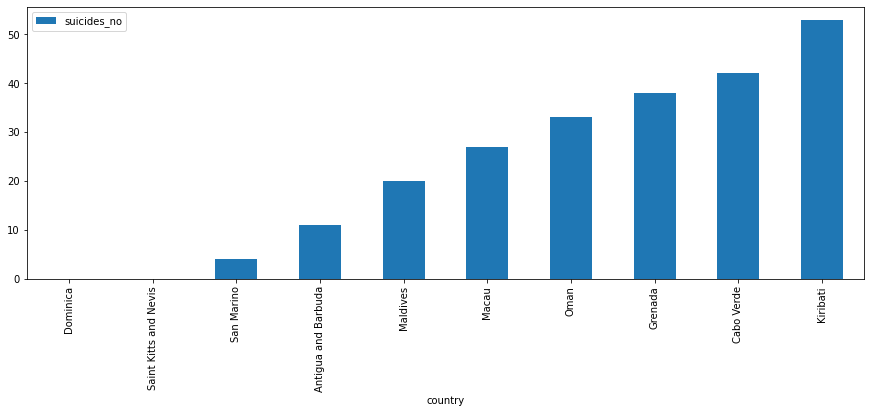

In [31]:
data.groupby(by=['country'])['suicides_no'].sum().reset_index().sort_values(['suicides_no'],ascending = True).head(10).plot(x = 'country',y ='suicides_no',kind = 'bar',figsize=(15,5))
plt.show()

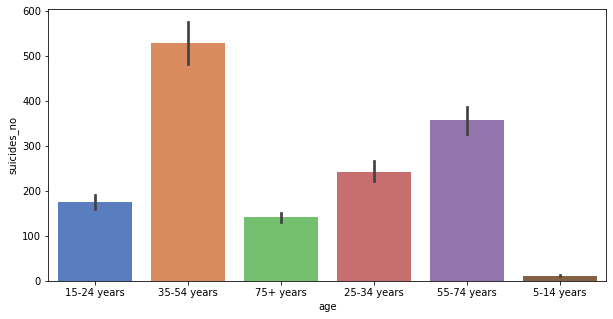

In [32]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x = 'age', y='suicides_no', data= data, palette= 'muted')

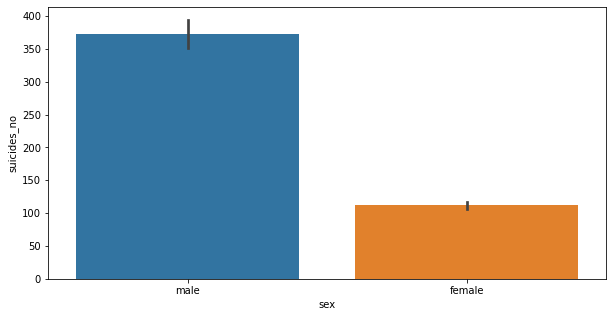

In [33]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x = 'sex', y='suicides_no', data= data)

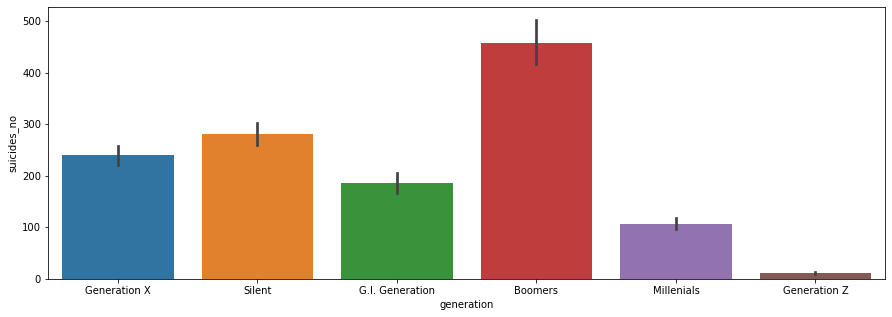

In [34]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x = 'generation', y='suicides_no', data= data)

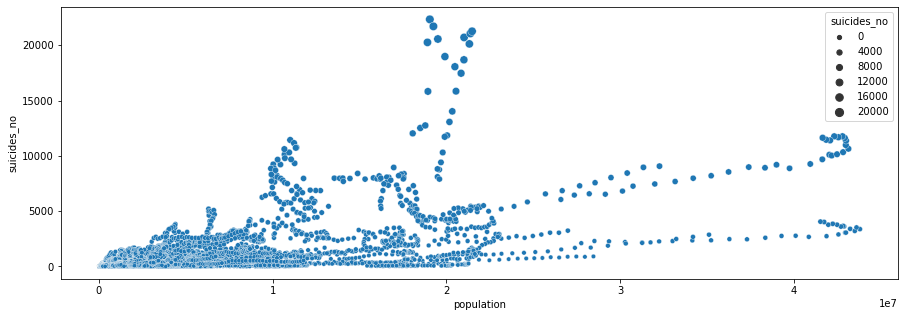

In [35]:
plt.figure(figsize=(15,5))
ax = sns.scatterplot(x =data['population'], y='suicides_no', data= data, size ='suicides_no')

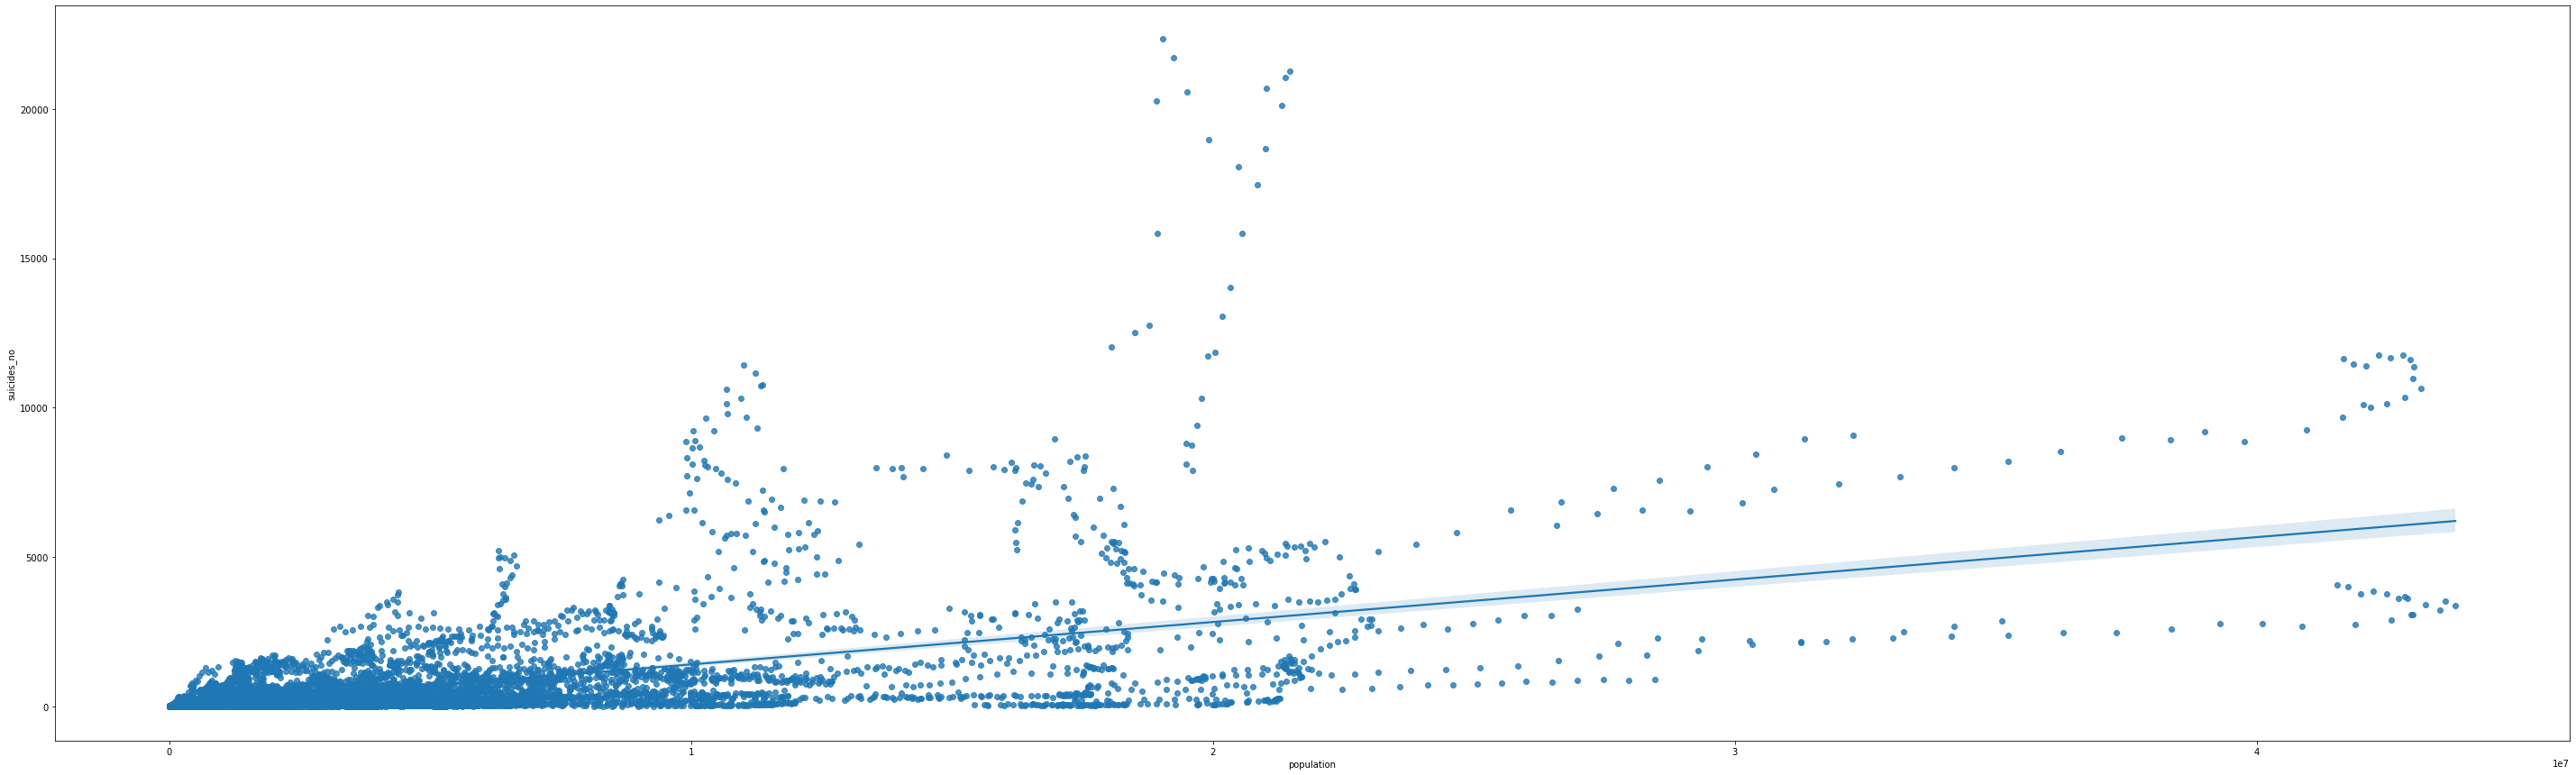

In [40]:
#Drawing a regression line to make the relationship in a scatter plot clear
plt.figure(figsize=(50,15))
ax = sns.regplot(x =data['population'], y='suicides_no', data= data)

<AxesSubplot:xlabel='population', ylabel='suicides_no'>

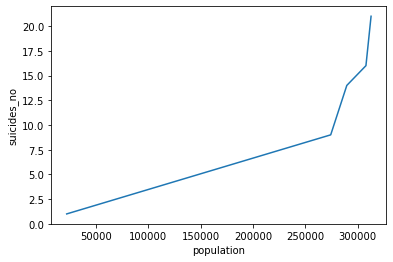

In [44]:
sns.lineplot(x ='population', y='suicides_no', data= data.head())

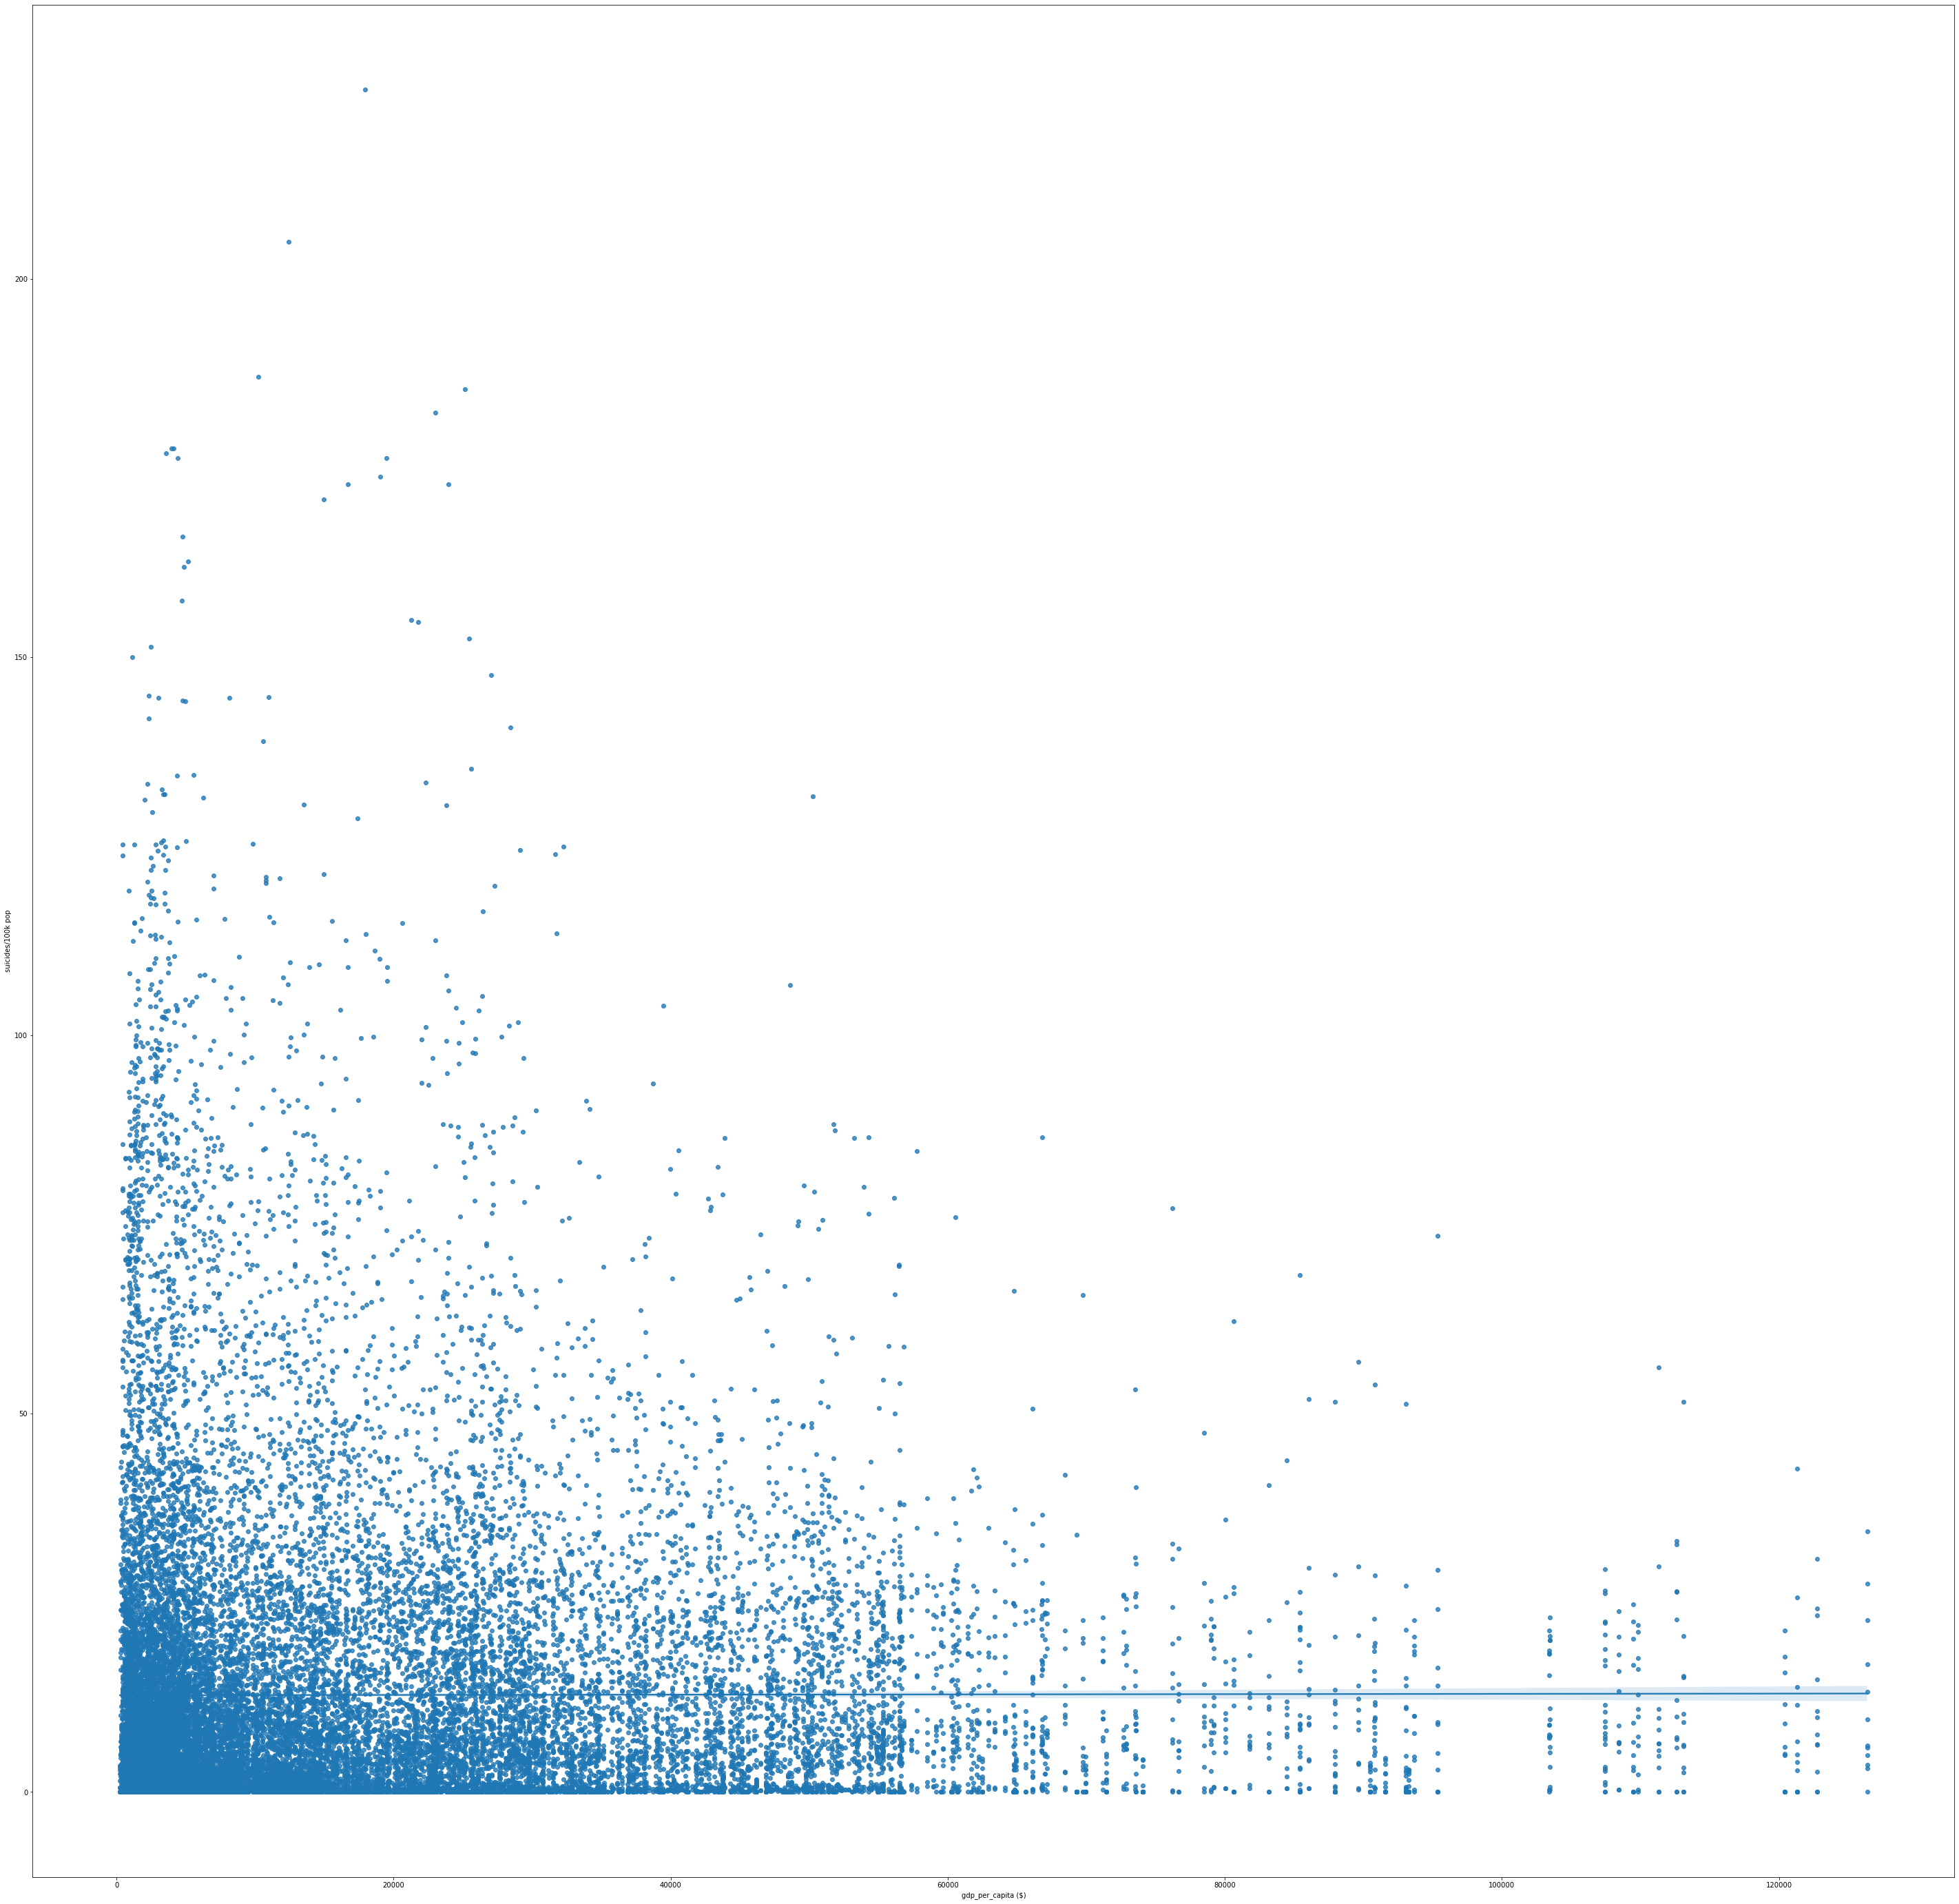

In [46]:
plt.figure(figsize=(50,50))
ax = sns.regplot(x =data['gdp_per_capita ($)'], y='suicides/100k pop', data= data)

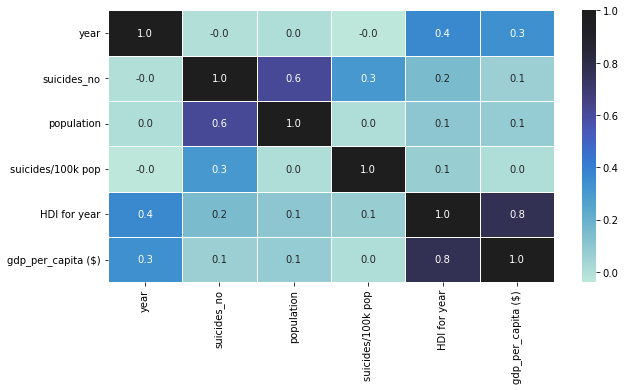

In [47]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(), annot= True, linewidths=.5, fmt='.1f', center= 1)
plt.show()

### Use of hue to introduce a thrid variable

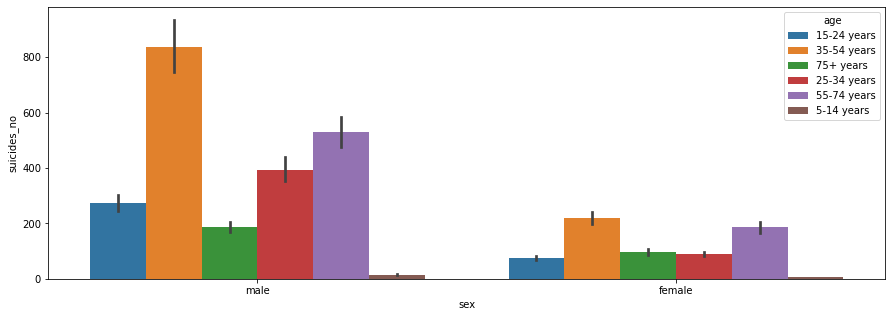

In [48]:
plt.figure(figsize=(15,5))
sns.barplot(data = data, x= 'sex', y ='suicides_no', hue = 'age')
plt.show()

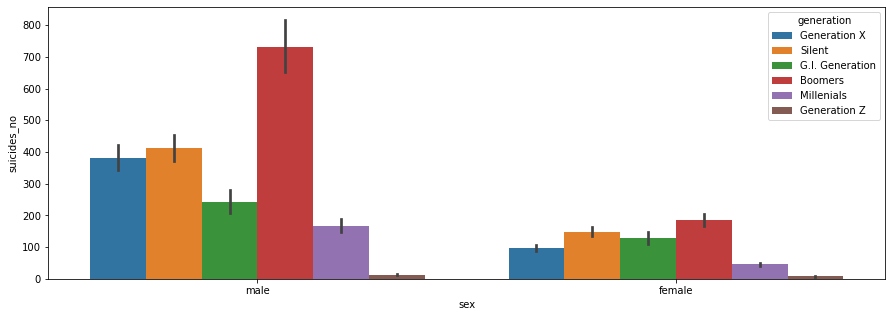

In [49]:
plt.figure(figsize=(15,5))
sns.barplot(data = data, x= 'sex', y ='suicides_no', hue = 'generation')
plt.show()

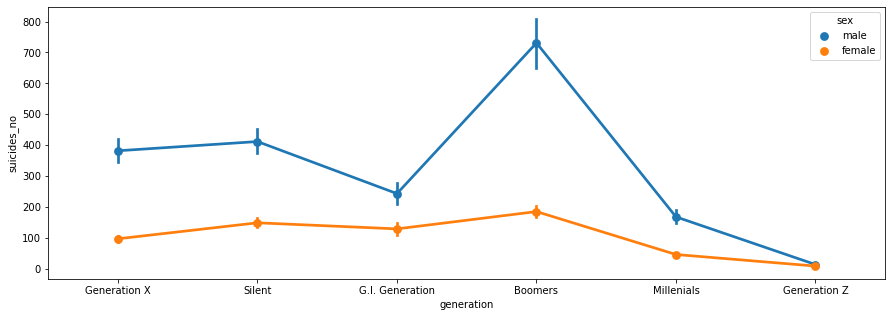

In [50]:
plt.figure(figsize=(15,5))
sns.pointplot(data = data, x= 'generation', y ='suicides_no', hue = 'sex')
plt.show()

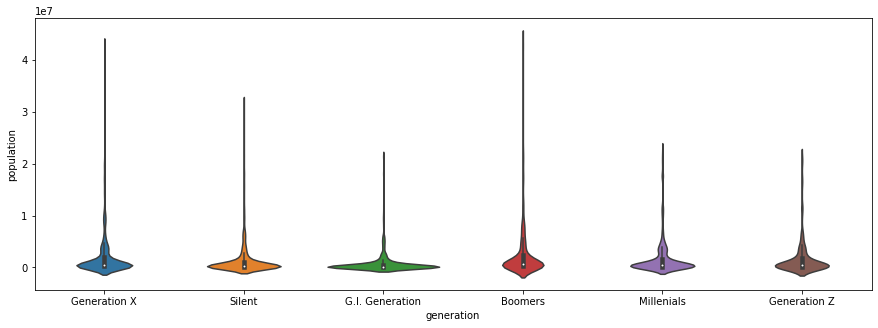

In [51]:
plt.figure(figsize=(15,5))
sns.violinplot(x=data.generation, y =data['population'])
plt.show()

###  Temporal Data

- Represents data over time

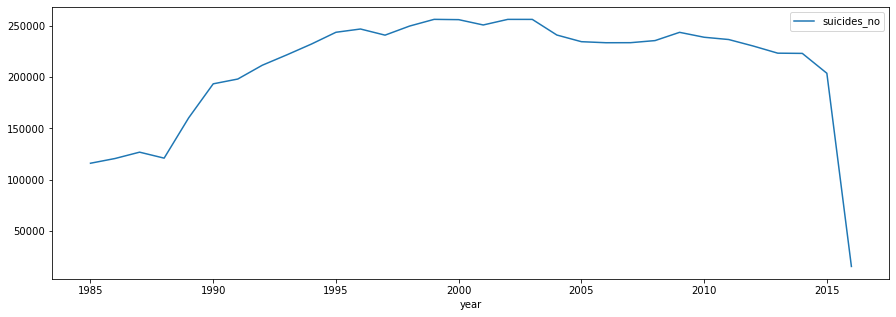

In [53]:
data[['year','suicides_no']].groupby(['year']).sum().plot(figsize=(15,5))
plt.show()